In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate

Process and Intake Data


Training model for label_1...
Epoch [10/100], Train Loss: 0.9550, Val Loss: 0.9593
Epoch [20/100], Train Loss: 0.9395, Val Loss: 0.9323
Epoch [30/100], Train Loss: 0.9291, Val Loss: 0.9331
Epoch [40/100], Train Loss: 0.9252, Val Loss: 0.9319
Epoch [50/100], Train Loss: 0.9226, Val Loss: 0.9300
Epoch [60/100], Train Loss: 0.9200, Val Loss: 0.9304
Epoch [70/100], Train Loss: 0.9178, Val Loss: 0.9281
Epoch [80/100], Train Loss: 0.9159, Val Loss: 0.9282
Epoch [90/100], Train Loss: 0.9146, Val Loss: 0.9278
Epoch [100/100], Train Loss: 0.9134, Val Loss: 0.9269
Accuracy: 0.7090


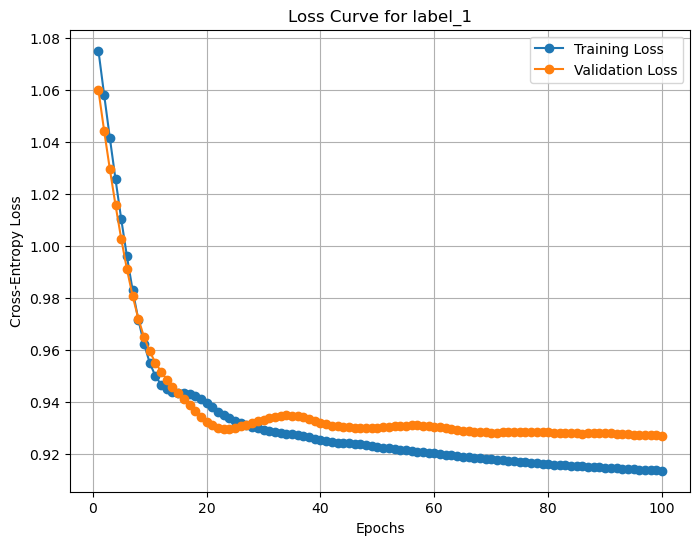


Evaluating model for label_1...

Evaluating model for label_2...

Evaluating model for label_3...

Evaluating model for label_5...

Evaluating model for label_10...

Results Summary:
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Model      | Label (k)   |   Accuracy |   Weighted Precision |   Weighted Recall |   Weighted F1-score |
+============+=============+============+======================+===================+=====================+
| Simple MLP | label_1     |     0.709  |               0.6168 |            0.709  |              0.598  |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_2     |     0.6244 |               0.5394 |            0.6244 |              0.4894 |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_3     |     0.5662 |               0.5092 |   

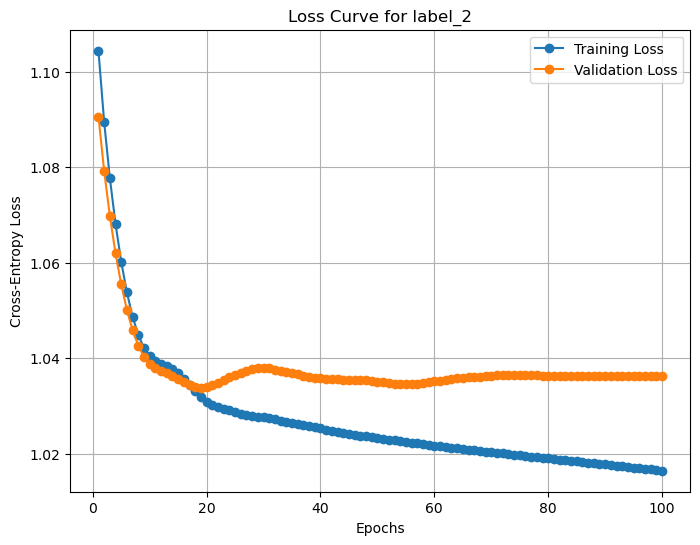


Evaluating model for label_1...

Evaluating model for label_2...

Evaluating model for label_3...

Evaluating model for label_5...

Evaluating model for label_10...

Results Summary:
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Model      | Label (k)   |   Accuracy |   Weighted Precision |   Weighted Recall |   Weighted F1-score |
+============+=============+============+======================+===================+=====================+
| Simple MLP | label_1     |     0.7045 |               0.6069 |            0.7045 |              0.616  |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_2     |     0.626  |               0.5382 |            0.626  |              0.5142 |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_3     |     0.5718 |               0.5025 |   

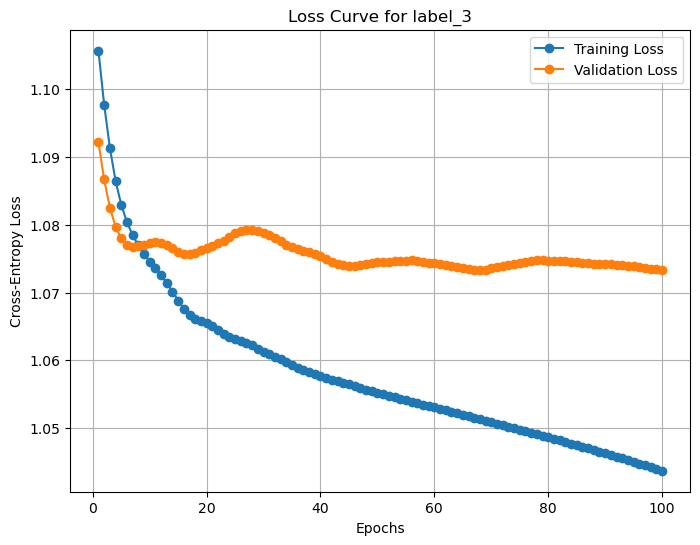


Evaluating model for label_1...

Evaluating model for label_2...

Evaluating model for label_3...

Evaluating model for label_5...

Evaluating model for label_10...

Results Summary:
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Model      | Label (k)   |   Accuracy |   Weighted Precision |   Weighted Recall |   Weighted F1-score |
+============+=============+============+======================+===================+=====================+
| Simple MLP | label_1     |     0.6308 |               0.6106 |            0.6308 |              0.6192 |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_2     |     0.5783 |               0.5305 |            0.5783 |              0.5458 |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_3     |     0.5518 |               0.5017 |   

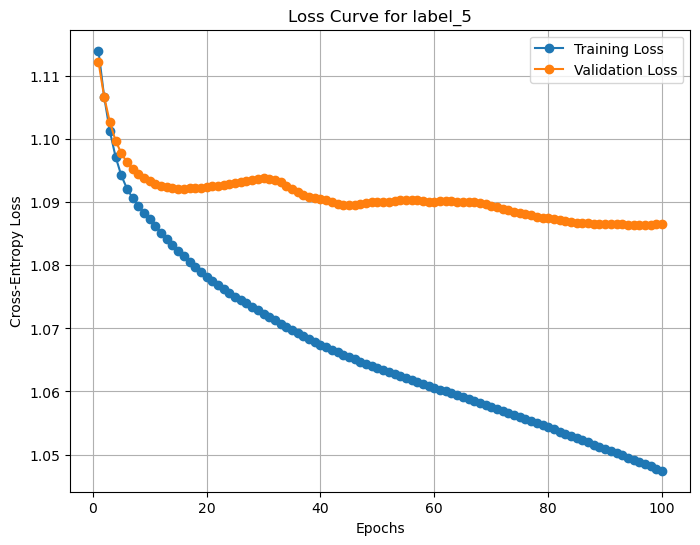


Evaluating model for label_1...

Evaluating model for label_2...

Evaluating model for label_3...

Evaluating model for label_5...

Evaluating model for label_10...

Results Summary:
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Model      | Label (k)   |   Accuracy |   Weighted Precision |   Weighted Recall |   Weighted F1-score |
+============+=============+============+======================+===================+=====================+
| Simple MLP | label_1     |     0.4394 |               0.6175 |            0.4394 |              0.4856 |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_2     |     0.4318 |               0.5342 |            0.4318 |              0.4609 |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_3     |     0.4409 |               0.5006 |   

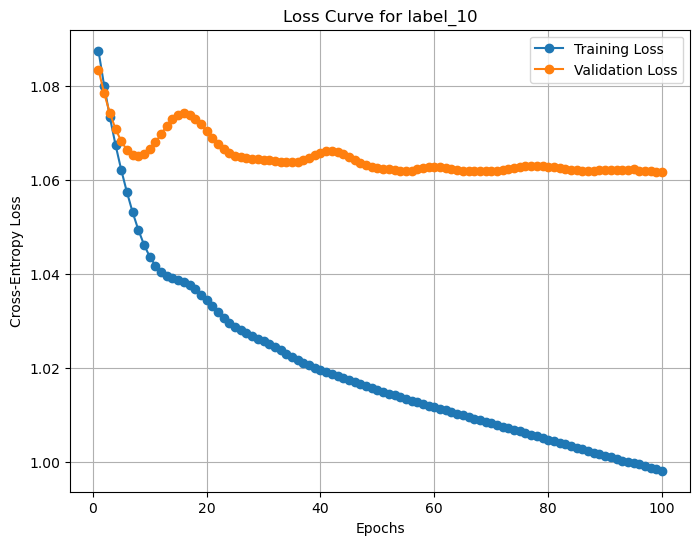


Evaluating model for label_1...

Evaluating model for label_2...

Evaluating model for label_3...

Evaluating model for label_5...

Evaluating model for label_10...

Results Summary:
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Model      | Label (k)   |   Accuracy |   Weighted Precision |   Weighted Recall |   Weighted F1-score |
+============+=============+============+======================+===================+=====================+
| Simple MLP | label_1     |     0.1978 |               0.6317 |            0.1978 |              0.1446 |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_2     |     0.2339 |               0.5491 |            0.2339 |              0.1766 |
+------------+-------------+------------+----------------------+-------------------+---------------------+
| Simple MLP | label_3     |     0.27   |               0.5142 |   

In [10]:
def load_and_preprocess_data(train_path, test_path):

    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    
    # Extract features and labels
    feature_columns = train_df.columns[:59]  
    label_columns = ["label_1", "label_2", "label_3", "label_5", "label_10"]
    
    X_train = train_df[feature_columns].values
    X_test = test_df[feature_columns].values
    
    y_train = train_df[label_columns]
    y_test = test_df[label_columns]
    
    # Adjust labels to start from 0
    y_train = y_train - 1
    y_test = y_test - 1
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    
    y_train_tensors = {label: torch.tensor(y_train[label].values, dtype=torch.long) for label in label_columns}
    y_test_tensors = {label: torch.tensor(y_test[label].values, dtype=torch.long) for label in label_columns}
    
    return X_train_tensor, X_test_tensor, y_train_tensors, y_test_tensors, label_columns


class StockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=3):
        super(StockPredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        return self.model(x)


def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100):
    model.train()
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        # Training step
        predictions = model(X_train)
        train_loss = criterion(predictions, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        train_losses.append(train_loss.item())
        
        # Validation step
        model.eval()
        with torch.no_grad():
            val_predictions = model(X_val)
            val_loss = criterion(val_predictions, y_val)
            val_losses.append(val_loss.item())
        
        model.train()
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}")
    
    return model, train_losses, val_losses


def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
        predicted_labels = torch.argmax(predictions, axis=1)
        accuracy = accuracy_score(y_test.numpy(), predicted_labels.numpy())
        print(f"Accuracy: {accuracy:.4f}")
    return accuracy

def plot_loss(target_name, train_losses, val_losses):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
    plt.title(f"Loss Curve for {target_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Cross-Entropy Loss")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_and_print_metrics(model, X_test, y_test_tensors, label_columns):
    results_table = []

    for label in label_columns:
        print(f"\nEvaluating model for {label}...")
        model.eval()
        with torch.no_grad():
            predictions = model(X_test)
            predicted_classes = torch.argmax(predictions, dim=1).numpy()
            true_classes = y_test_tensors[label].numpy()
        
        # Calculate metrics
        accuracy = accuracy_score(true_classes, predicted_classes)
        precision, recall, f1, _ = precision_recall_fscore_support(
            true_classes, predicted_classes, average="weighted"
        )
        
        # Append results to the table
        results_table.append(["Simple MLP", label, f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}"])
    
    # Print the table
    headers = ["Model", "Label (k)", "Accuracy", "Weighted Precision", "Weighted Recall", "Weighted F1-score"]
    print("\nResults Summary:")
    print(tabulate(results_table, headers=headers, tablefmt="grid"))


if __name__ == "__main__":
    X_train, X_test, y_train_tensors, y_test_tensors, label_columns = load_and_preprocess_data(
        "Train_NoAuction_Zscore.csv", "Test_NoAuction_Zscore.csv"
    )
    
    # Create a validation split from the training data
    val_size = int(0.2 * X_train.size(0))
    X_val, X_train = X_train[:val_size], X_train[val_size:]
    y_val_tensors = {label: tensor[:val_size] for label, tensor in y_train_tensors.items()}
    y_train_tensors = {label: tensor[val_size:] for label, tensor in y_train_tensors.items()}
    
    results = {}
    for label in label_columns:
        print(f"\nTraining model for {label}...")
        
        # Model initialization
        input_size = X_train.shape[1]
        hidden_size = 64
        output_size = 3  # 3 classes
        learning_rate = 0.001
        num_epochs = 100
        
        model = StockPredictor(input_size, hidden_size, output_size)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Train and evaluate the model
        trained_model, train_losses, val_losses = train_model(
            model, criterion, optimizer, X_train, y_train_tensors[label], X_val, y_val_tensors[label], num_epochs
        )
        accuracy = evaluate_model(trained_model, X_test, y_test_tensors[label])
        results[label] = accuracy
        
        # Plot loss curve
        plot_loss(label, train_losses, val_losses)

        evaluate_and_print_metrics(trained_model, X_test, y_test_tensors, label_columns)